In [ ]:
# 時系列データのさまざまな異常・変化の例

In [ ]:
import os
import re
import numpy as np
import changefinder
import matplotlib.pyplot as plt
cmap = plt.get_cmap("tab10")

In [53]:
number_of_points = 1000

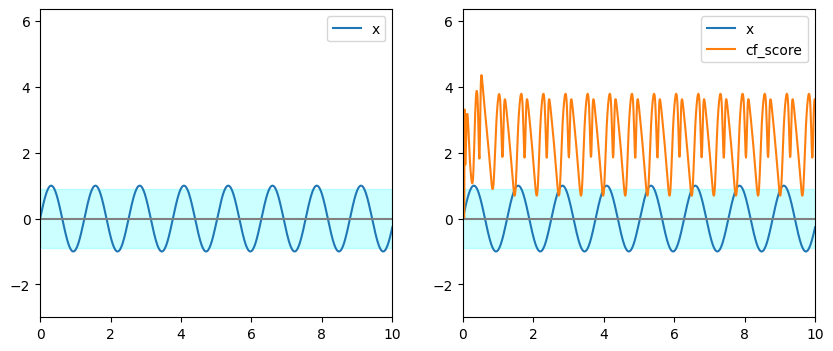

In [90]:
# サイン波のデータを作成し、グラフを表示する
def plot_sin_wave():
    x = np.linspace(0, 10, number_of_points)
    y = np.sin(5*x)
    cf = changefinder.ChangeFinder(r=0.1, order=1, smooth=3)
    scores = [cf.update(point) for point in y]
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(x, y, c=cmap(0), label='x')
    ax[0].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[0].plot(x, [0]*number_of_points, c='gray')
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(min(min(y),min(scores))-2, max(max(y),max(scores))+2)
    ax[0].legend()
    ax[1].plot(x, y, c=cmap(0), label='x')
    ax[1].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[1].plot(x, scores, c=cmap(1), label='cf_score')
    ax[1].plot(x, [0]*number_of_points, c='gray')
    ax[1].set_xlim(0, 10)
    ax[1].set_ylim(min(min(y),min(scores))-2, max(max(y),max(scores))+2)
    ax[1].legend()
    plt.show()

plot_sin_wave()

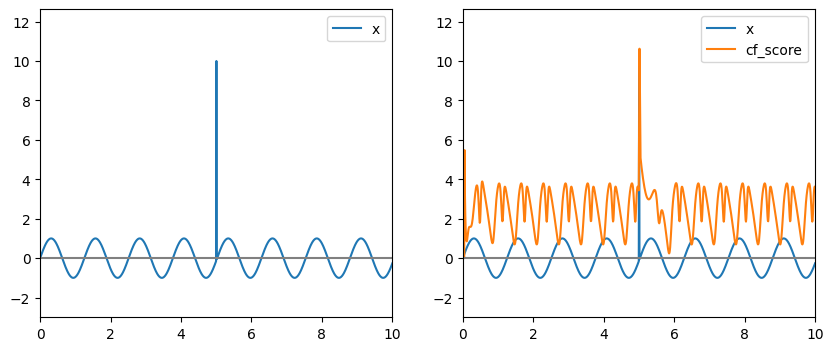

In [72]:
# 異常値を含むサイン波のデータを作成し、グラフを表示する
def plot_sin_wave_with_anomaly():
    x = np.linspace(0, 10, number_of_points)
    y = np.sin(5*x)
    y[int(number_of_points/2)] = 10
    cf = changefinder.ChangeFinder(r=0.1, order=1, smooth=3)
    scores = [cf.update(point) for point in y]
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(x, y, c=cmap(0), label='x')
    ax[0].plot(x, [0]*number_of_points, c='gray')
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(min(min(y),min(scores))-2, max(max(y),max(scores))+2)
    ax[0].legend()
    ax[1].plot(x, y, c=cmap(0), label='x')
    ax[1].plot(x, scores, c=cmap(1), label='cf_score')
    ax[1].plot(x, [0]*number_of_points, c='gray')
    ax[1].set_xlim(0, 10)
    ax[1].set_ylim(min(min(y),min(scores))-2, max(max(y),max(scores))+2)
    ax[1].legend()
    plt.show()

plot_sin_wave_with_anomaly()

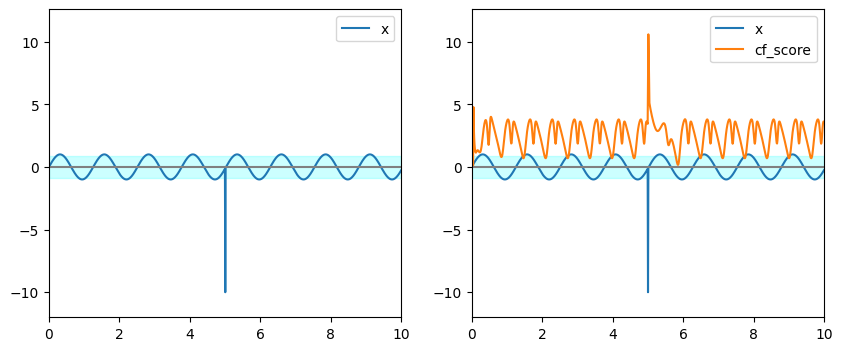

In [91]:
# 異常値を含むサイン波のデータを作成し、グラフを表示する
def plot_sin_wave_with_anomaly():
    x = np.linspace(0, 10, number_of_points)
    y = np.sin(5*x)
    y[int(number_of_points/2)] = -10
    cf = changefinder.ChangeFinder(r=0.1, order=1, smooth=3)
    scores = [cf.update(point) for point in y]
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(x, y, c=cmap(0), label='x')
    ax[0].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[0].plot(x, [0]*number_of_points, c='gray')
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(min(min(y),min(scores))-2, max(max(y),max(scores))+2)
    ax[0].legend()
    ax[1].plot(x, y, c=cmap(0), label='x')
    ax[1].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[1].plot(x, scores, c=cmap(1), label='cf_score')
    ax[1].plot(x, [0]*number_of_points, c='gray')
    ax[1].set_xlim(0, 10)
    ax[1].set_ylim(min(min(y),min(scores))-2, max(max(y),max(scores))+2)
    ax[1].legend()
    plt.show()

plot_sin_wave_with_anomaly()

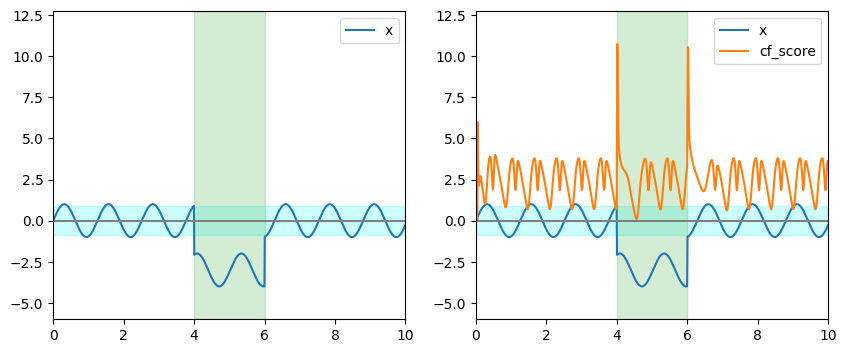

In [92]:
# 突然変異を含むサイン波のデータを作成し、グラフを表示する
window = 100
def plot_sin_wave_with_change():
    x = np.linspace(0, 10, number_of_points)
    y = np.sin(5*x)
    y[int(number_of_points/2)-window:int(number_of_points/2)+window] = y[int(number_of_points/2)-window:int(number_of_points/2)+window] - 3
    cf = changefinder.ChangeFinder(r=0.1, order=1, smooth=3)
    scores = [cf.update(point) for point in y]
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(x, y, c=cmap(0), label='x')
    ax[0].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[0].axvspan(int(int(number_of_points/2)-window)/number_of_points*10, int(int(number_of_points/2)+window)/number_of_points*10, color=cmap(2), alpha=0.2)
    ax[0].plot(x, [0]*number_of_points, c='gray')
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(min(min(y),min(scores))-2, max(max(y),max(scores))+2)
    ax[0].legend()
    ax[1].plot(x, y, c=cmap(0), label='x')
    ax[1].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[1].axvspan(int(int(number_of_points/2)-window)/number_of_points*10, int(int(number_of_points/2)+window)/number_of_points*10, color=cmap(2), alpha=0.2)
    ax[1].plot(x, scores, c=cmap(1), label='cf_score')
    ax[1].plot(x, [0]*number_of_points, c='gray')
    ax[1].set_xlim(0, 10)
    ax[1].set_ylim(min(min(y),min(scores))-2, max(max(y),max(scores))+2)
    ax[1].legend()
    plt.show()

plot_sin_wave_with_change()

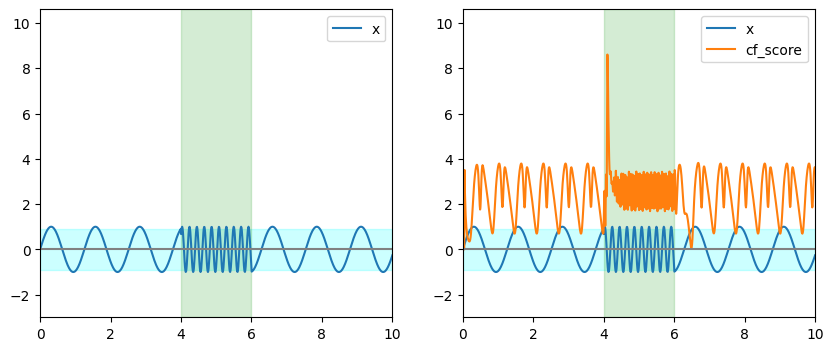

In [93]:
# 異常値を含むサイン波のデータを作成し、グラフを表示する
window = 100
def plot_sin_wave_with_anomaly():
    x = np.linspace(0, 10, number_of_points)
    y = np.sin(5*x)
    y[int(number_of_points/2)-window:int(number_of_points/2)+window] = np.sin(30*x[int(number_of_points/2)-window:int(number_of_points/2)+window])
    cf = changefinder.ChangeFinder(r=0.1, order=1, smooth=3)
    scores = [cf.update(point) for point in y]
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(x, y, c=cmap(0), label='x')
    ax[0].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[0].axvspan(int(int(number_of_points/2)-window)/number_of_points*10, int(int(number_of_points/2)+window)/number_of_points*10, color=cmap(2), alpha=0.2)
    ax[0].plot(x, [0]*number_of_points, c='gray')
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(min(min(y),min(scores))-2, max(max(y),max(scores))+2)
    ax[0].legend()
    ax[1].plot(x, y, c=cmap(0), label='x')
    ax[1].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[1].axvspan(int(int(number_of_points/2)-window)/number_of_points*10, int(int(number_of_points/2)+window)/number_of_points*10, color=cmap(2), alpha=0.2)
    ax[1].plot(x, scores, c=cmap(1), label='cf_score')
    ax[1].plot(x, [0]*number_of_points, c='gray')
    ax[1].set_xlim(0, 10)
    ax[1].set_ylim(min(min(y),min(scores))-2, max(max(y),max(scores))+2)
    ax[1].legend()
    plt.show()
plot_sin_wave_with_anomaly()

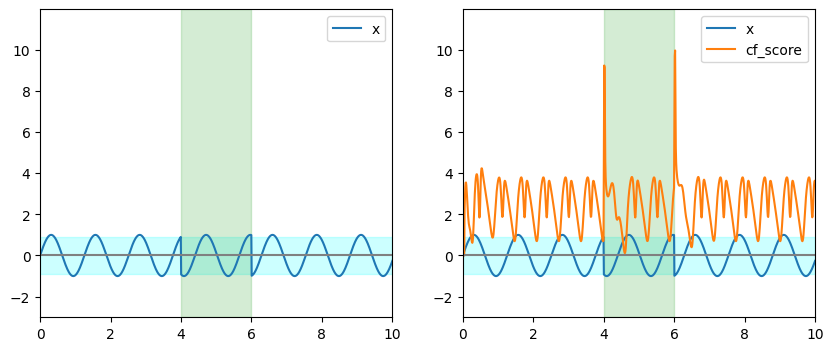

In [94]:
# 異常値を含むサイン波のデータを作成し、グラフを表示する
window = 100
def plot_sin_wave_with_anomaly():
    x = np.linspace(0, 10, number_of_points)
    y = np.sin(5*x)
    y[int(number_of_points/2)-window:int(number_of_points/2)+window] = np.sin(5*x[int(number_of_points/2)-window:int(number_of_points/2)+window]+np.pi)
    cf = changefinder.ChangeFinder(r=0.1, order=1, smooth=3)
    scores = [cf.update(point) for point in y]
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].plot(x, y, c=cmap(0), label='x')
    ax[0].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[0].axvspan(int(int(number_of_points/2)-window)/number_of_points*10, int(int(number_of_points/2)+window)/number_of_points*10, color=cmap(2), alpha=0.2)
    ax[0].plot(x, [0]*number_of_points, c='gray')
    ax[0].set_xlim(0, 10)
    ax[0].set_ylim(min(min(y),min(scores))-2, max(max(y),max(scores))+2)
    ax[0].legend()
    ax[1].plot(x, y, c=cmap(0), label='x')
    ax[1].axhspan(-0.9, 0.9, color="cyan", alpha=0.2)
    ax[1].axvspan(int(int(number_of_points/2)-window)/number_of_points*10, int(int(number_of_points/2)+window)/number_of_points*10, color=cmap(2), alpha=0.2)
    ax[1].plot(x, scores, c=cmap(1), label='cf_score')
    ax[1].plot(x, [0]*number_of_points, c='gray')
    ax[1].set_xlim(0, 10)
    ax[1].set_ylim(min(min(y),min(scores))-2, max(max(y),max(scores))+2)
    ax[1].legend()
    plt.show()
    
plot_sin_wave_with_anomaly()